In [121]:
import os
import shutil
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from shutil import copyfile
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img

In [136]:
source_path = 'dataset'

source_path_soil = os.path.join(source_path, 'Soil')
source_path_grass = os.path.join(source_path, 'Grass')
source_path_soybean = os.path.join(source_path, 'Soybean')

print(f"There are {len(os.listdir(source_path_soil))} images of soils.")
print(f"There are {len(os.listdir(source_path_grass))} images of grasses.")
print(f"There are {len(os.listdir(source_path_soybean))} images of soybeans.")

There are 3249 images of soils.
There are 3520 images of grasses.
There are 7376 images of soybeans.


In [137]:
# Define root directory
root_dir = 'soils-v-grasses-v-soybeans'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
    shutil.rmtree(root_dir)

def create_train_test_dirs(root_path):
    os.makedirs(os.path.join(root_path, 'training'))
    os.makedirs(os.path.join(root_path, 'testing'))
    os.makedirs(os.path.join(root_path, 'training/soils'))
    os.makedirs(os.path.join(root_path, 'training/grasses'))
    os.makedirs(os.path.join(root_path, 'training/soybeans'))
    os.makedirs(os.path.join(root_path, 'testing/soils'))
    os.makedirs(os.path.join(root_path, 'testing/grasses'))
    os.makedirs(os.path.join(root_path, 'testing/soybeans'))
    
try:
    create_train_test_dirs(root_path=root_dir)
except FileExistsError:
    print("You should not be seeing this since the upper directory is removed beforehand")

In [138]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

soils-v-grasses-v-soybeans\testing
soils-v-grasses-v-soybeans\training
soils-v-grasses-v-soybeans\testing\grasses
soils-v-grasses-v-soybeans\testing\soils
soils-v-grasses-v-soybeans\testing\soybeans
soils-v-grasses-v-soybeans\training\grasses
soils-v-grasses-v-soybeans\training\soils
soils-v-grasses-v-soybeans\training\soybeans


In [139]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    filtered_files = []

    for file_name in os.listdir(SOURCE):
        file_path = os.path.join(SOURCE, file_name)
        
        if os.path.getsize(file_path):
            filtered_files.append(file_name)
        else:
            print('{} is zero length, so ignoring.'.format(file_name))
  
    # Split the files
    random_files = random.sample(filtered_files, len(filtered_files))
    split = int(SPLIT_SIZE * len(filtered_files))
    training_files = random_files[:split]
    testing_files = random_files[split:]

    # Copy the files
    for file_name in training_files:
        copyfile(os.path.join(SOURCE, file_name), os.path.join(TRAINING, file_name))

    for file_name in testing_files:
        copyfile(os.path.join(SOURCE, file_name), os.path.join(TESTING, file_name))

In [140]:
SOIL_SOURCE_DIR = "dataset/soil"
GRASS_SOURCE_DIR = "dataset/grass"
SOYBEAN_SOURCE_DIR = "dataset/soybean"

TRAINING_DIR = "soils-v-grasses-v-soybeans/training/"
TESTING_DIR = "soils-v-grasses-v-soybeans/testing/"

TRAINING_SOILS_DIR = os.path.join(TRAINING_DIR, "soils/")
TESTING_SOILS_DIR = os.path.join(TESTING_DIR, "soils/")

TRAINING_GRASSES_DIR = os.path.join(TRAINING_DIR, "grasses/")
TESTING_GRASSES_DIR = os.path.join(TESTING_DIR, "grasses/")

TRAINING_SOYBEANS_DIR = os.path.join(TRAINING_DIR, "soybeans/")
TESTING_SOYBEANS_DIR = os.path.join(TESTING_DIR, "soybeans/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_SOILS_DIR)) > 0:
    for file in os.scandir(TRAINING_SOILS_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_GRASSES_DIR)) > 0:
    for file in os.scandir(TRAINING_GRASSES_DIR):
        os.remove(file.path)
if len(os.listdir(TRAINING_SOYBEANS_DIR)) > 0:
    for file in os.scandir(TRAINING_SOYBEANS_DIR):
        os.remove(file.path)    
if len(os.listdir(TESTING_SOILS_DIR)) > 0:
    for file in os.scandir(TESTING_SOILS_DIR):
        os.remove(file.path)
if len(os.listdir(TESTING_GRASSES_DIR)) > 0:
    for file in os.scandir(TESTING_GRASSES_DIR):
        os.remove(file.path)
if len(os.listdir(TESTING_SOYBEANS_DIR)) > 0:
    for file in os.scandir(TESTING_SOYBEANS_DIR):
        os.remove(file.path)
        
# Define proportion of images used for training
split_size = .9

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(SOIL_SOURCE_DIR, TRAINING_SOILS_DIR, TESTING_SOILS_DIR, split_size)
split_data(GRASS_SOURCE_DIR, TRAINING_GRASSES_DIR, TESTING_GRASSES_DIR, split_size)
split_data(SOYBEAN_SOURCE_DIR, TRAINING_SOYBEANS_DIR, TESTING_SOYBEANS_DIR, split_size)

# Check that the number of images matches the expected output
print(f"\n\nThere are {len(os.listdir(TRAINING_SOILS_DIR))} images of soils for training")
print(f"There are {len(os.listdir(TRAINING_GRASSES_DIR))} images of grasses for training")
print(f"There are {len(os.listdir(TRAINING_SOYBEANS_DIR))} images of soybeans for training")
print(f"There are {len(os.listdir(TESTING_SOILS_DIR))} images of soils for testing")
print(f"There are {len(os.listdir(TESTING_GRASSES_DIR))} images of grasses for testing")
print(f"There are {len(os.listdir(TESTING_SOYBEANS_DIR))} images of soybeans for testing")



There are 2924 images of soils for training
There are 3168 images of grasses for training
There are 6638 images of soybeans for training
There are 325 images of soils for testing
There are 352 images of grasses for testing
There are 738 images of soybeans for testing


<h1><center>MODEL A (without pre-trained model)</center></h1>

In [127]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Instantiate the ImageDataGenerator class 
    train_datagen = ImageDataGenerator(rescale = 1.0 / 255.,
                                     rotation_range = 40,
                                     width_shift_range = .2,
                                     height_shift_range = .2,
                                     shear_range = .2,
                                     zoom_range = .2,
                                     horizontal_flip = True,
                                     fill_mode = 'nearest')

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size = 64,
                                                      class_mode = 'categorical',
                                                      target_size = (150, 150))

    # Instantiate the ImageDataGenerator class 
    validation_datagen = ImageDataGenerator(rescale = 1.0 / 255.,
                                          rotation_range = 40,
                                          width_shift_range = .2,
                                          height_shift_range = .2,
                                          shear_range = .2,
                                          zoom_range = .2,
                                          horizontal_flip = True,
                                          fill_mode = 'nearest')

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory = VALIDATION_DIR,
                                                                batch_size = 64,
                                                                class_mode = 'categorical',
                                                                target_size = (150, 150))

    return train_generator, validation_generator

In [128]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 12730 images belonging to 3 classes.
Found 1415 images belonging to 3 classes.


In [129]:
# Make the model
model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [130]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 17, 17, 128)      

In [131]:
# Compile the model
model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [132]:
# Train the model
history = model.fit(
    train_generator,
    epochs=5,  
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/5
199/199 [==============================] - 360s 2s/step - loss: 0.3482 - accuracy: 0.8581 - val_loss: 0.1874 - val_accuracy: 0.9300
Epoch 2/5
199/199 [==============================] - 321s 2s/step - loss: 0.1865 - accuracy: 0.9313 - val_loss: 0.1757 - val_accuracy: 0.9435
Epoch 3/5
199/199 [==============================] - 308s 2s/step - loss: 0.1265 - accuracy: 0.9545 - val_loss: 0.0727 - val_accuracy: 0.9717
Epoch 4/5
199/199 [==============================] - 296s 1s/step - loss: 0.0966 - accuracy: 0.9672 - val_loss: 0.0871 - val_accuracy: 0.9661
Epoch 5/5
199/199 [==============================] - 327s 2s/step - loss: 0.0875 - accuracy: 0.9705 - val_loss: 0.0468 - val_accuracy: 0.9880


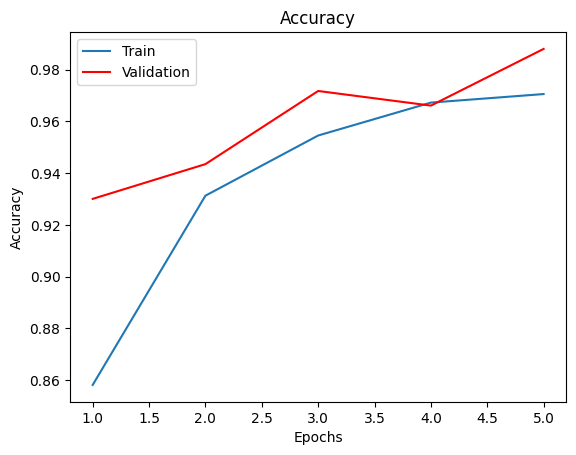

In [133]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy')
plt.plot(epochs,acc,label='Train')
plt.plot(epochs,val_acc,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

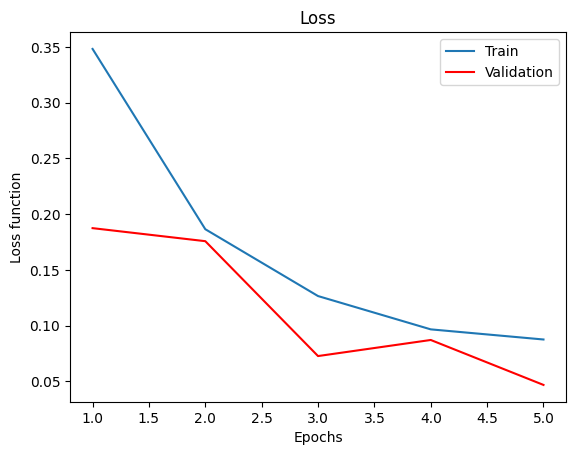

In [134]:
loss_function = history.history['loss']
val_loss_function = history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss')
plt.plot(epochs,loss_function,label='Train')
plt.plot(epochs,val_loss_function,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

1/1 [==============================] - 0s 28ms/step


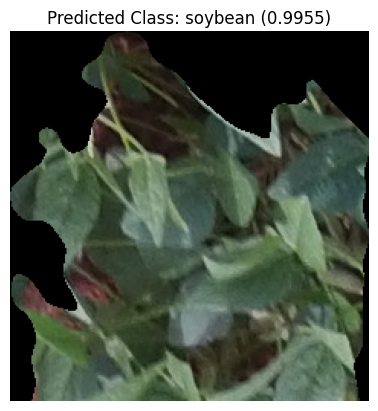

In [84]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to load and preprocess an image for prediction
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 
    return img_array

# Path to the image you want to predict
image_path = 'dataset/soybean/11.tif'

# Load and preprocess the image
input_image = load_and_preprocess_image(image_path)

# Make a prediction
predictions = model.predict(input_image)

# Decode the predictions
class_labels = ['soil', 'grass', 'soybean']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

# Display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_label} ({predicted_probability:.4f})')
plt.show()

<h1><center>MODEL B (with pre-trained model)</center></h1>

In [141]:
# Load the pre-trained ResNet50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Freeze the pre-trained layers so that they are not trainable
for layer in base_model.layers:
    layer.trainable = False

In [142]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    # Instantiate the ImageDataGenerator class 
    train_datagen = ImageDataGenerator(rescale = 1.0 / 255.,
                                     rotation_range = 40,
                                     width_shift_range = .2,
                                     height_shift_range = .2,
                                     shear_range = .2,
                                     zoom_range = .2,
                                     horizontal_flip = True,
                                     fill_mode = 'nearest')

    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory = TRAINING_DIR,
                                                      batch_size = 64,
                                                      class_mode = 'categorical',
                                                      target_size = (150, 150))

    # Instantiate the ImageDataGenerator class 
    validation_datagen = ImageDataGenerator(rescale = 1.0 / 255.,
                                          rotation_range = 40,
                                          width_shift_range = .2,
                                          height_shift_range = .2,
                                          shear_range = .2,
                                          zoom_range = .2,
                                          horizontal_flip = True,
                                          fill_mode = 'nearest')

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory = VALIDATION_DIR,
                                                                batch_size = 64,
                                                                class_mode = 'categorical',
                                                                target_size = (150, 150))

    return train_generator, validation_generator

In [143]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 12730 images belonging to 3 classes.
Found 1415 images belonging to 3 classes.


In [149]:
# Make the model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [150]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_10 (Flatten)        (None, 51200)             0         
                                                                 
 dense_20 (Dense)            (None, 512)               26214912  
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 49804163 (189.99 MB)
Trainable params: 26216451 (100.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [151]:
# Compile the model
model.compile(optimizer=Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [153]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  
    validation_data=validation_generator,
    verbose=1
)

Epoch 1/10
199/199 [==============================] - 576s 3s/step - loss: 0.9044 - accuracy: 0.5214 - val_loss: 0.8357 - val_accuracy: 0.5216
Epoch 2/10
199/199 [==============================] - 574s 3s/step - loss: 0.8983 - accuracy: 0.5214 - val_loss: 0.8151 - val_accuracy: 0.5216
Epoch 3/10
199/199 [==============================] - 575s 3s/step - loss: 0.8830 - accuracy: 0.5212 - val_loss: 0.7789 - val_accuracy: 0.5216
Epoch 4/10
199/199 [==============================] - 575s 3s/step - loss: 0.9107 - accuracy: 0.5231 - val_loss: 0.8289 - val_accuracy: 0.5216
Epoch 5/10
199/199 [==============================] - 577s 3s/step - loss: 0.8889 - accuracy: 0.5214 - val_loss: 0.8464 - val_accuracy: 0.5216
Epoch 6/10
199/199 [==============================] - 585s 3s/step - loss: 0.8734 - accuracy: 0.5346 - val_loss: 0.7485 - val_accuracy: 0.6509
Epoch 7/10
199/199 [==============================] - 575s 3s/step - loss: 0.8731 - accuracy: 0.5494 - val_loss: 0.7532 - val_accuracy: 0.6855

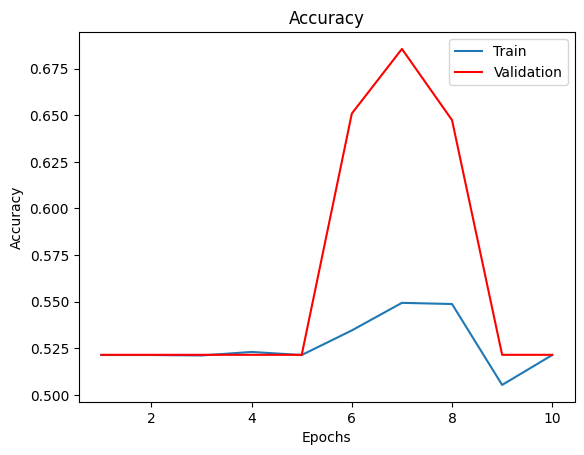

In [154]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy')
plt.plot(epochs,acc,label='Train')
plt.plot(epochs,val_acc,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

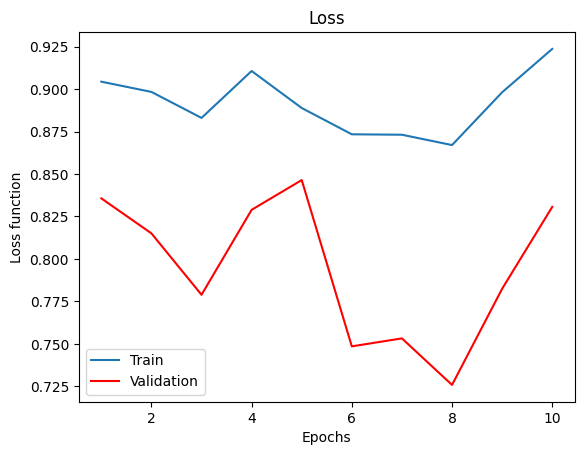

In [155]:
loss_function = history.history['loss']
val_loss_function = history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss')
plt.plot(epochs,loss_function,label='Train')
plt.plot(epochs,val_loss_function,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

1/1 [==============================] - 0s 128ms/step


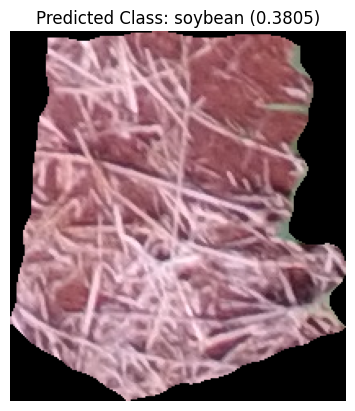

In [175]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to load and preprocess an image for prediction
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0 
    return img_array

# Path to the image you want to predict
image_path = 'dataset/soil/114.tif'

# Load and preprocess the image
input_image = load_and_preprocess_image(image_path)

# Make a prediction
predictions = model.predict(input_image)

# Decode the predictions
class_labels = ['soil', 'grass', 'soybean']
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
predicted_probability = predictions[0][predicted_class_index]

# Display the image
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Class: {predicted_class_label} ({predicted_probability:.4f})')
plt.show()